In [20]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import sympy as sy
import control as ctrl
import control.matlab as ctrlmatlab
from scipy import signal

In [21]:
num = np.array([0.05, 0.25e-3])
den = [1, 10e-3,25e-6]

# Create the transfer function
system = signal.TransferFunction(num, den)
# Define the time vector for the impulse response (inverse Laplace transform)
t = np.linspace(0, 1400, 1000)  # 1000 points between 0 and 10 seconds
# Compute the impulse response (inverse Laplace transform)
t_stp, y_stp = signal.step(system, T=t)

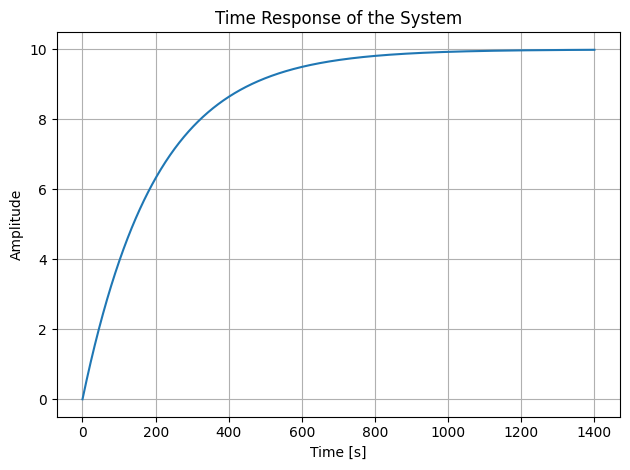

In [22]:
# Plot the impulse response (time-domain representation)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Time Response of the System')
# Plot the impulse response (time-domain representation)
plt.plot(t_stp, y_stp)
plt.grid(True)
plt.tight_layout()
plt.savefig('pw2_item1_1.pdf')

plt.show()

In [23]:
#normalize the step response
y_max = max(y_stp)
target_value = 5
A = target_value / y_max
print("A",A)

A 0.5004563571266123


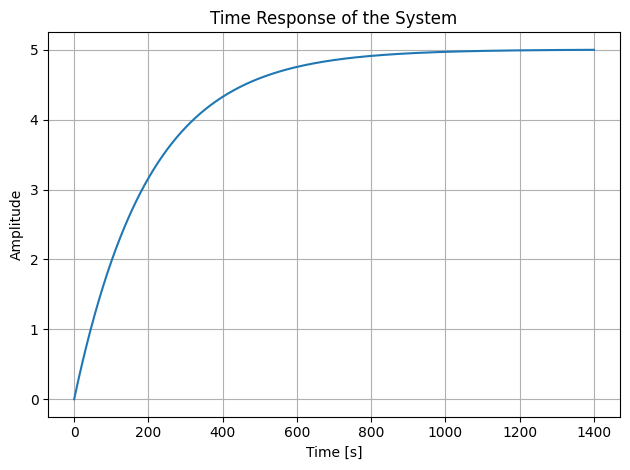

In [24]:
y_stp = A * y_stp
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Time Response of the System')
# Plot the impulse response (time-domain representation)
plt.plot(t_stp, y_stp)
plt.grid(True)
plt.tight_layout()
plt.savefig('pw2_item1_2.pdf')

plt.show()

In [25]:
#Valor do estado estacionário
print("Valor do estado estacionário: ", y_stp[-1])
#Como é sinal não é oscilatório, não há overshoot

Valor do estado estacionário:  5.000000000000001


In [26]:
#Encontrando o tempo de subida
max_y = max(y_stp)
len_y = len(y_stp)
t_10 = 0
t_10_index = 0
t_90 = 0
t_90_index = 0
for i in range(len_y):
    if y_stp[i] >= 0.1*max_y and t_10 == 0:
        t_10 = t_stp[i]
        t_10_index = i
    if y_stp[i] >= 0.9*max_y and t_90 == 0:
        t_90 = t_stp[i]
        t_90_index = i
        break
print(f"Tempo de subida: {t_90-t_10}")

Tempo de subida: 437.23723723723725


In [27]:
# Encontrando o tempo de estabilização

for i in range(len_y):
    y_index = len_y-1-i
    if y_stp[y_index] < 0.98*max_y:
        print(f"Tempo de acomodacao: {t_stp[y_index]}")
        break

Tempo de acomodacao: 773.5735735735735


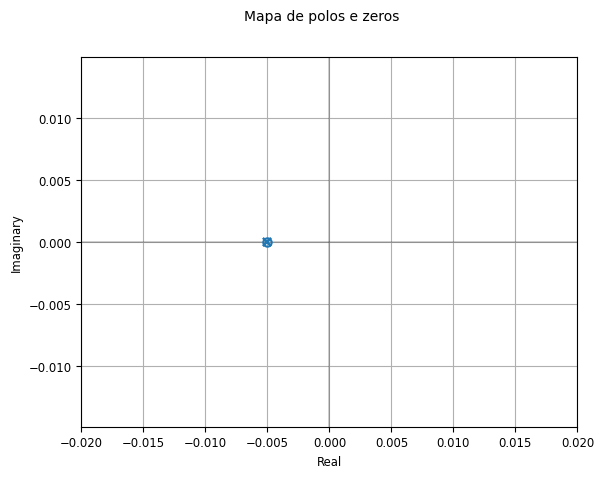

Polos: [-0.005+0.j -0.005+0.j]
Zeros: [-0.005+0.j]


In [28]:
system = ctrl.TransferFunction(num, den)
# Plotando polos e zeros
plt.figure()
poles, zeros = ctrl.pzmap(system, plot=True, title=f'Mapa de polos e zeros')
#Como esse sistema é de segunda ordem, apesar da simplificaç~ao, ele possui dois polos sobrepostos e nenhum zero
plt.grid()
plt.xlim(-0.02, 0.02)
plt.show()
print(f'Polos: {poles}')
print(f'Zeros: {zeros}')